# Data Analysis Using Python Task-3

## Step 1 : Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

## Load dataset

In [2]:
df=pd.read_csv("D:/customer_data.csv")

## Basic Info

In [10]:
print(" Shape:",df.shape)

 Shape: (303, 4)


In [11]:
print("Data types:",df.dtypes)

Data types: Customer ID        object
Age               float64
Annual Income     float64
Spending Score    float64
dtype: object


In [12]:
print("Summary Statistics:",df.describe())

Summary Statistics:               Age  Annual Income  Spending Score
count  298.000000     298.000000      298.000000
mean    43.489933   81634.510067       49.785235
std     15.358397   40448.424653       29.436244
min     18.000000   16542.000000        1.000000
25%     30.250000   43565.000000       24.250000
50%     44.000000   84245.500000       51.000000
75%     56.000000  117908.250000       75.000000
max     69.000000  149508.000000       99.000000


In [13]:
print(" Missing Values:",df.isnull().sum())

 Missing Values: Customer ID       0
Age               5
Annual Income     5
Spending Score    5
dtype: int64


## Remove duplicates

In [17]:
df.drop_duplicates()

,Customer ID,Age,Annual Income,Spending Score
0,CUST1000,56.0,44855.0,49.0
1,CUST1001,69.0,22400.0,14.0
2,CUST1002,46.0,132858.0,15.0
3,CUST1003,32.0,30151.0,31.0
4,CUST1004,60.0,81690.0,51.0
...,...,...,...,...
295,CUST1295,18.0,84449.0,3.0
296,CUST1296,65.0,28843.0,31.0
297,CUST1297,29.0,129065.0,40.0
298,CUST1298,22.0,86726.0,36.0


## Step 2 : Data Preprocessing
## Fill Missing Values

In [18]:
df["Age"].fillna(df["Age"].median())
df["Annual Income"].fillna(df["Annual Income"].median())
df["Spending Score"].fillna(df["Spending Score"].median())

0      49.0
1      14.0
2      15.0
3      31.0
4      51.0
       ... 
295     3.0
296    31.0
297    40.0
298    36.0
299    24.0
Name: Spending Score, Length: 300, dtype: float64

## Standardize only numeric columns

In [19]:
features = ["Age", "Annual Income", "Spending Score"]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

## Step 3 : Clustering
## Elbow Method to find optimal k

In [21]:
warnings.filterwarnings("ignore", category=UserWarning)
os.environ["OMP_NUM_THREADS"] = "2"
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

## Plot Elbow


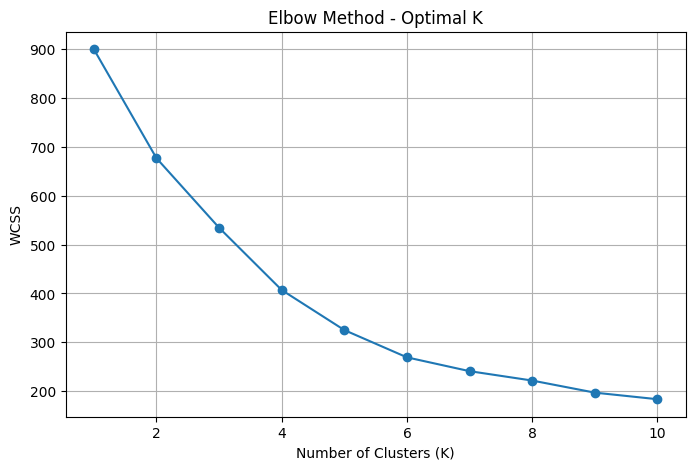

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.title("Elbow Method - Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

## Silhouette Score

In [23]:
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f"Silhouette Score for k={k}: {score:.4f}")

Silhouette Score for k=2: 0.2366
Silhouette Score for k=3: 0.2450
Silhouette Score for k=4: 0.2859
Silhouette Score for k=5: 0.3046
Silhouette Score for k=6: 0.3224


## Apply K-Means with optimal K

In [24]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["Cluster"] = kmeans.fit_predict(scaled_data)

## Step 4: Visualization
## 2D Scatter Plot using PCA

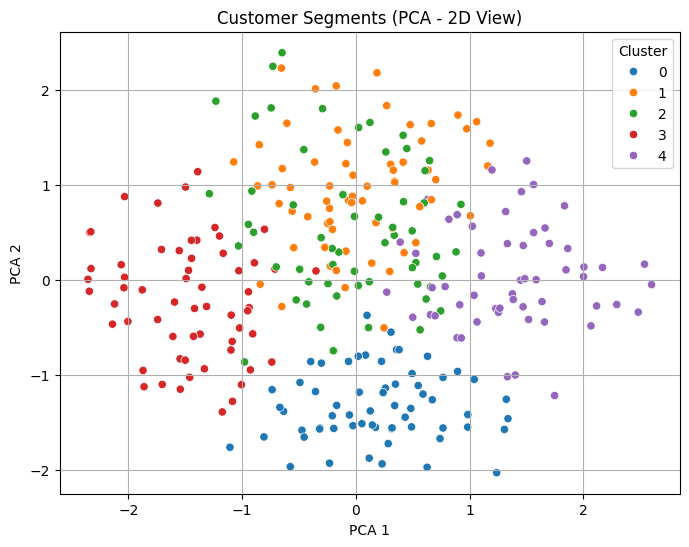

In [25]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
df["PCA1"] = pca_components[:, 0]
df["PCA2"] = pca_components[:, 1]
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="tab10")
plt.title("Customer Segments (PCA - 2D View)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

## Pairplot by Cluster

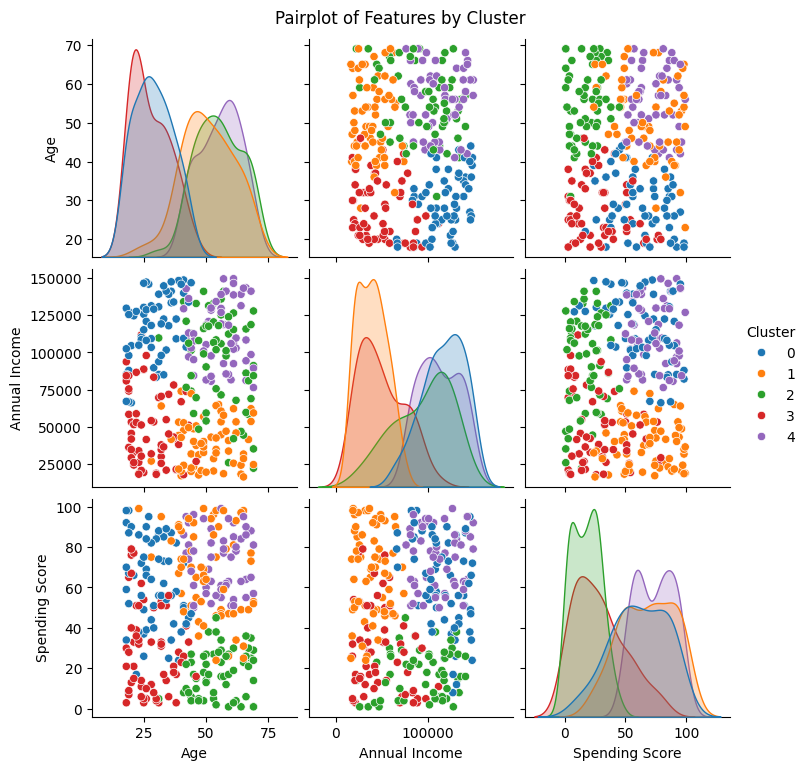

In [26]:
sns.pairplot(df[["Age", "Annual Income", "Spending Score", "Cluster"]], hue="Cluster", palette="tab10")
plt.suptitle("Pairplot of Features by Cluster", y=1.02)
plt.show()